In [1]:
import cv2
img=cv2.imread('./view1.jpeg')

In [2]:
scalimg=cv2.resize(img, (640,480))
gray = cv2.cvtColor(scalimg, cv2.COLOR_BGR2GRAY) 
gray = cv2.GaussianBlur(gray, (9,9),3)

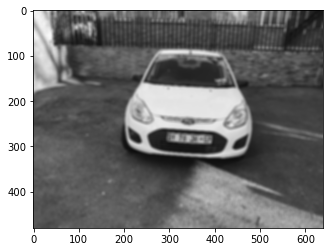

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
edges = cv2.Canny(gray, lowThresh, high_thresh) 

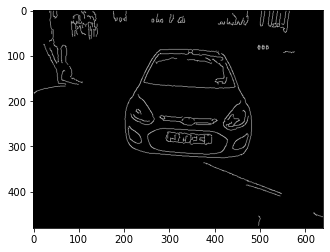

In [5]:
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()


First we will try to dilate the image for connecting the discontinous contours then we will try to remove the contours which are small.

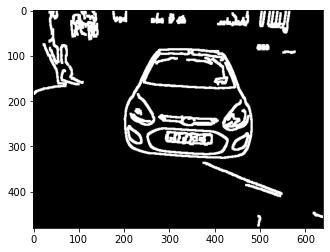

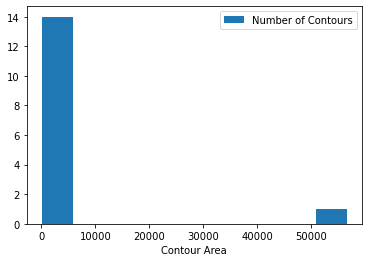

In [6]:
import imutils
import numpy as np
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(edges, kernel, iterations=2)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
plt.show()
contarea=[]
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
scalimgcopy=scalimg.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cnt_area = cv2.contourArea(c)
    contarea.append(cnt_area)
    if cnt_area < 0.0625 * 640*480:
        dilate[y:y + h, x:x + w] = 0
        
plt.hist(contarea, label= "Number of Contours")
plt.xlabel("Contour Area")
plt.legend()
plt.show()


In [7]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
cnt=cnts[0] #Selecting maximum area contour
scalimgcopy1=scalimgcopy.copy()
scalimgcopy=cv2.drawContours(scalimgcopy, cnt, -1, (0,255,0), 3)

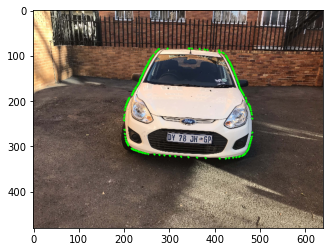

In [8]:
plt.imshow(cv2.cvtColor(scalimgcopy, cv2.COLOR_BGR2RGB))
plt.show()

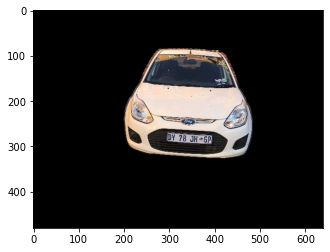

In [9]:
#Isolating the region of interest
mask = np.zeros(gray.shape,np.uint8)
detected_image = cv2.drawContours(mask,[cnt],0,255,-1,)
detected_image1 = cv2.bitwise_and(scalimg,scalimg,mask=mask)
plt.imshow(cv2.cvtColor(detected_image1, cv2.COLOR_BGR2RGB))
plt.show()


Now we try to convert the background to white

In [10]:
detected_img=detected_image1.copy()
ret=cv2.floodFill(detected_img, None, (638, 478),(255,255,255))


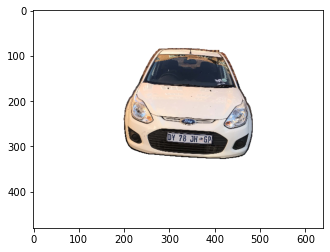

In [11]:
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
plt.show()